# **Exploratory Analysis on Lunch Delivery Time Series Data**

## **1. Import data**

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
data_dir = "/home/angps/Documents/Thesis/Data/"
image_dir = "/home/angps/Documents/Thesis/Report/Images/"
df = pd.read_csv(data_dir + "full_df_with_exo.csv")

In [2]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(852, 204)

**There are 839 locations with the following exogenous variables:**
- Temperature
- Wind
- Gust
- Cloud
- Humidity
- Precipitation
- Pressure

## **2. Exploratory Analysis on endogenous demand data**

In [4]:
endo_df = df.iloc[:839,:]
endo_df.shape

(839, 204)

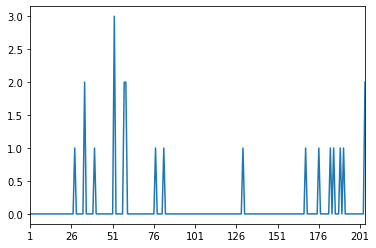

In [13]:
endo_df.iloc[315,:].plot()

Text(0.5, 1.0, 'Time series at Location 315')

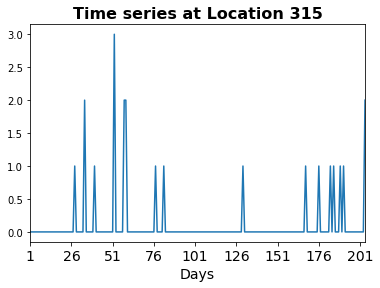

In [15]:
plt.figure(figsize=(6, 4))
endo_df.iloc[315,:].plot()
plt.xlabel("Days", fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("Time series at Location 315", fontsize = 16, fontweight = 'bold')
#plt.savefig(image_dir + "boxplot_counts.jpg")

### **2.1 Mean of each day**

Text(0.5, 1.0, 'Mean Demand of all locations across days')

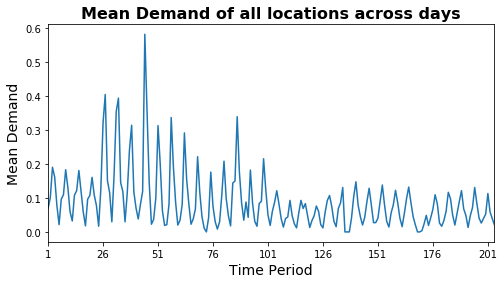

In [5]:
mean_demand = endo_df.mean()
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of all locations across days", fontsize = 16, fontweight = 'bold')

### **2.2 Percentage of locations with low counts of demand**

In [6]:
num_of_non_zeros = (endo_df != 0).sum(axis=1)

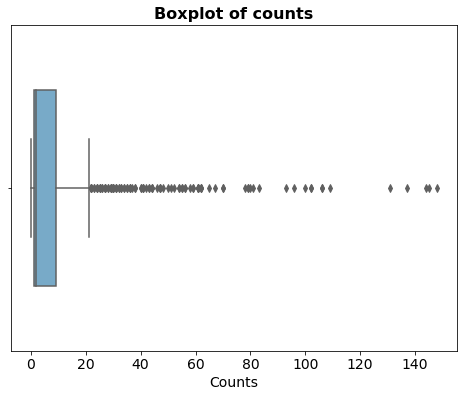

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(num_of_non_zeros, width = 0.6, palette="Blues")
plt.xlabel("Counts", fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("Boxplot of counts", fontsize = 16, fontweight = 'bold')
plt.savefig(image_dir + "boxplot_counts.jpg")

(array([689.,  70.,  33.,  17.,  11.,   6.,   5.,   3.,   1.,   4.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <a list of 10 Patch objects>)

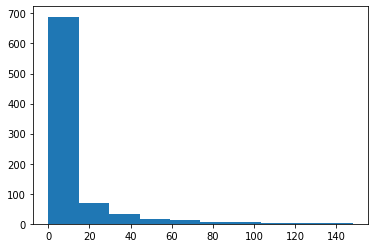

In [8]:
plt.hist(num_of_non_zeros)

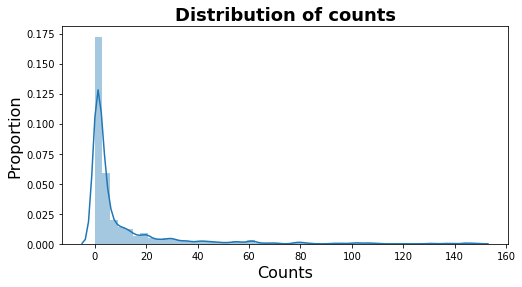

In [9]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(num_of_non_zeros)
plt.xlabel("Counts", fontsize = 16)
plt.ylabel("Proportion", fontsize = 16)
plt.title("Distribution of counts", fontsize = 18, fontweight = 'bold')
plt.savefig(image_dir + "distplot_counts.jpg")

In [10]:
pd.DataFrame({"Value":num_of_non_zeros.describe(percentiles=[0.95])})

,Value
count,839.000000
mean,9.909416
std,19.564321
min,0.000000
50%,2.000000
95%,48.200000
max,148.000000


We can see that there are alot of locations with very low non-zero demands in total for 2 months. To construct a baseline model, I would just use locations with **at least 50 counts** of data over 2 months only. 

In [11]:
pd.DataFrame(num_of_non_zeros.value_counts(sort = False)).reset_index().rename(columns = {"index": "Number of Non-zero Counts", 0: "Number of locations"}).head()

,Number of Non-zero Counts,Number of locations
0,0,99
1,1,236
2,2,93
3,3,64
4,4,55


## **3. Exploratory Analysis on exogenous data: Weather/Rainfall**

In [12]:
def dist_plot(data, xlabel, ylabel, title, fname):
    plt.figure(figsize=(8,4))
    sns.distplot(data)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 18, fontweight = 'bold')
    plt.savefig(image_dir + fname)

def plot_scatter(x, y, xlabel, ylabel, title, fname):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x, y)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 18, fontweight = 'bold')
    plt.savefig(image_dir + fname)

In [13]:
weather_df = pd.read_csv(data_dir + "time.csv")

In [14]:
weather_df.head()

,date,weekday,Temperature (degrees),Wind (KM/hr),Gust (KM/hr),Cloud (%),Humidity (%),Precipitation (mm),Pressure (mb)
0,08/10/15,Monday,27,29,48,84,87,0.0,1004
1,08/10/15,Monday,27,29,48,84,87,0.0,1004
2,08/10/15,Monday,27,29,48,84,87,0.0,1004
3,08/10/15,Monday,27,29,48,84,87,0.0,1004
4,08/10/15,Monday,27,29,48,84,87,0.0,1004


In [15]:
weather_df.describe()

,Temperature (degrees),Wind (KM/hr),Gust (KM/hr),Cloud (%),Humidity (%),Precipitation (mm),Pressure (mb)
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,27.500000,13.764706,17.941176,57.588235,66.147059,0.085294,1009.970588
std,2.347832,7.298257,11.718222,32.344925,11.881514,0.491183,4.071905
min,21.000000,4.000000,4.000000,6.000000,46.000000,0.000000,1001.000000
25%,27.000000,8.000000,10.000000,27.000000,58.000000,0.000000,1007.000000
50%,28.000000,12.500000,14.500000,54.000000,64.000000,0.000000,1009.500000
75%,29.000000,20.000000,23.000000,94.000000,73.000000,0.000000,1013.000000
max,31.000000,30.000000,48.000000,100.000000,92.000000,2.900000,1018.000000


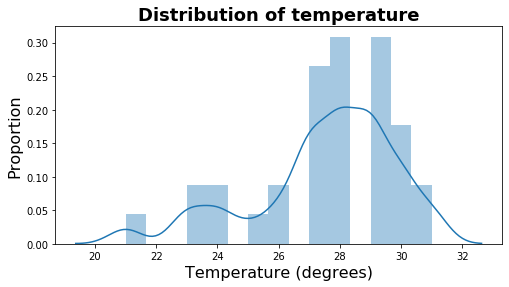

In [16]:
dist_plot(weather_df['Temperature (degrees)'], "Temperature (degrees)", "Proportion", "Distribution of temperature", 'distplot_temp')

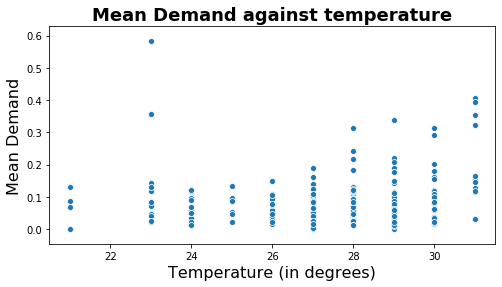

In [17]:
# Plot of temperature against mean demand
plot_scatter(weather_df['Temperature (degrees)'].values, mean_demand.values, "Temperature (in degrees)", "Mean Demand", "Mean Demand against temperature", "temp_mean_demand.jpg")

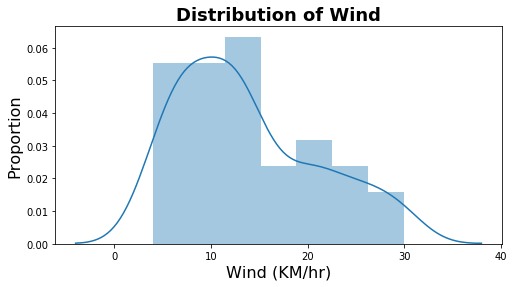

In [18]:
dist_plot(weather_df['Wind (KM/hr)'], "Wind (KM/hr)", "Proportion", "Distribution of Wind", 'distplot_wind')

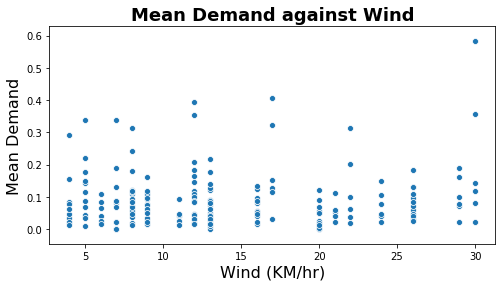

In [19]:
plot_scatter(weather_df['Wind (KM/hr)'].values, mean_demand.values, "Wind (KM/hr)", "Mean Demand", "Mean Demand against Wind", "wind_mean_demand.jpg")

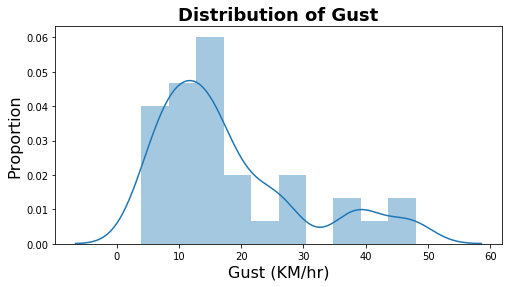

In [20]:
dist_plot(weather_df['Gust (KM/hr)'], "Gust (KM/hr)", "Proportion", "Distribution of Gust", 'distplot_gust')

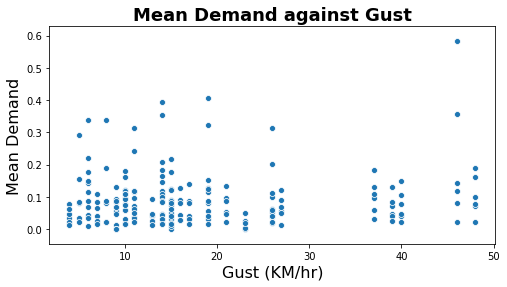

In [21]:
plot_scatter(weather_df['Gust (KM/hr)'].values, mean_demand.values, "Gust (KM/hr)", "Mean Demand", "Mean Demand against Gust", "gust_mean_demand.jpg")

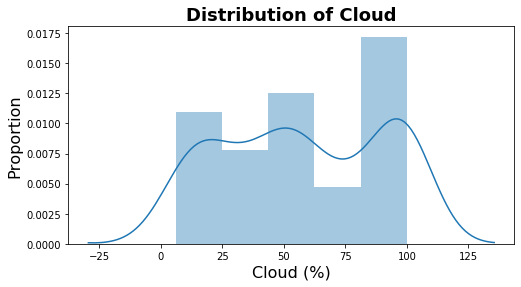

In [22]:
dist_plot(weather_df['Cloud (%)'], "Cloud (%)", "Proportion", "Distribution of Cloud", 'distplot_cloud')

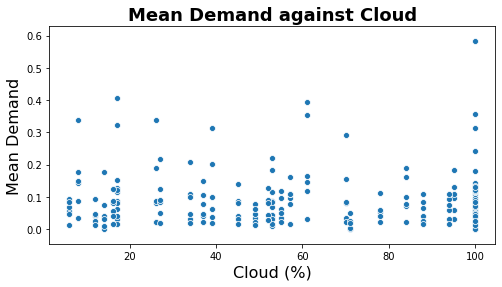

In [23]:
plot_scatter(weather_df['Cloud (%)'].values, mean_demand.values, "Cloud (%)", "Mean Demand", "Mean Demand against Cloud", "cloud_mean_demand.jpg")

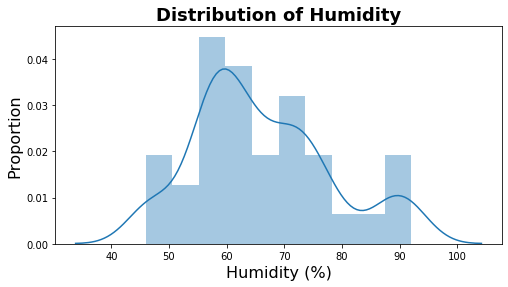

In [24]:
dist_plot(weather_df['Humidity (%)'], "Humidity (%)", "Proportion", "Distribution of Humidity", 'distplot_humidity')

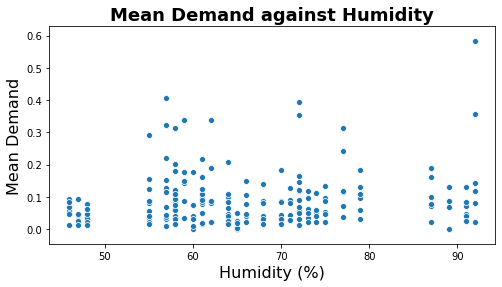

In [25]:
plot_scatter(weather_df['Humidity (%)'].values, mean_demand.values, "Humidity (%)", "Mean Demand", "Mean Demand against Humidity", "humidity_mean_demand.jpg")

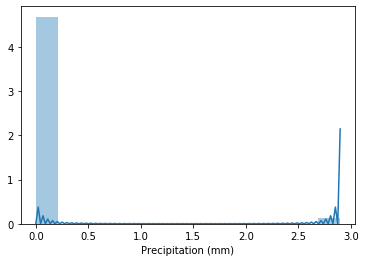

In [13]:
dist_plot(weather_df['Precipitation (mm)'], "Precipitation (mm)", "Proportion", "Distribution of Precipitation", 'distplot_prec')

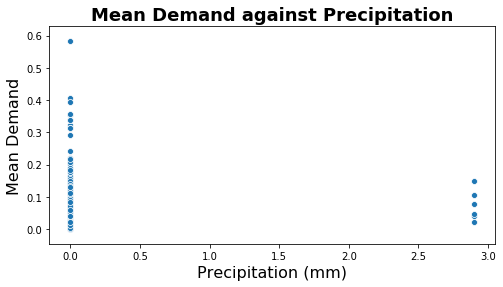

In [27]:
plot_scatter(weather_df['Precipitation (mm)'].values, mean_demand.values, "Precipitation (mm)", "Mean Demand", "Mean Demand against Precipitation", "prec_mean_demand.jpg")

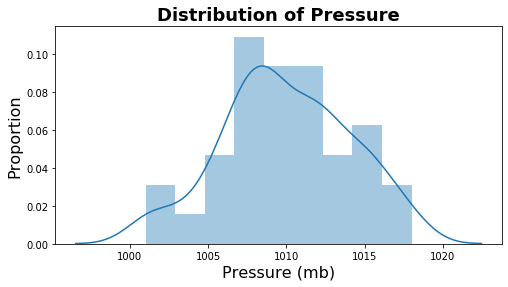

In [28]:
dist_plot(weather_df['Pressure (mb)'], "Pressure (mb)", "Proportion", "Distribution of Pressure", 'distplot_pressure')

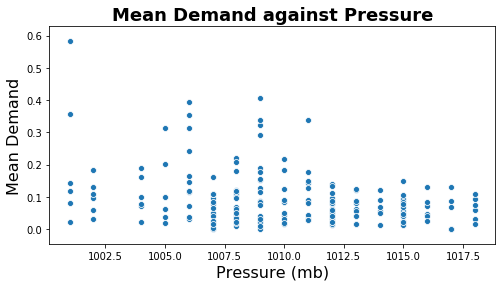

In [29]:
plot_scatter(weather_df['Pressure (mb)'].values, mean_demand.values, "Pressure (mb)", "Mean Demand", "Mean Demand against Pressure", "pressure_mean_demand.jpg")

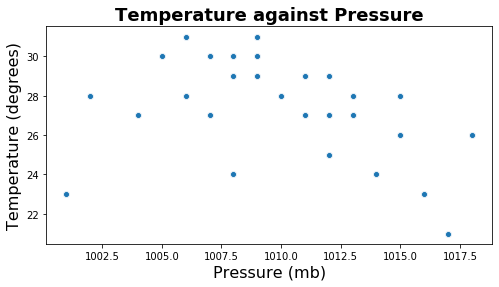

In [30]:
plot_scatter(weather_df['Pressure (mb)'].values, weather_df['Temperature (degrees)'].values, "Pressure (mb)", "Temperature (degrees)", "Temperature against Pressure", "pressure_tenp.jpg")